<a href="https://colab.research.google.com/github/LarsonBodden/Car-Purchasing-Model-Project/blob/main/Car_Purchasing_Model_Project_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Larson Bodden 

- Project 2
- 8/7/22

## Project Part 1

1) Source of data
- https://www.kaggle.com/datasets/dev0914sharma/car-purchasing-model

2) Brief description of data
- This data contain the information of the various people with the following detail which can help us to find out the better prediction and also help us to train our model to predict the correct value and get a good F1 Score.

3) What is the target?
- Car Purchase Amount

4) Is this a classification or regression problem?
- This is regression problem because i will be a predicting a discrete class label.

5) How many features?
- 6 features. I will also drop customer name and customer email because it does not add or change anything on the data set. 

6) How many rows of data.
- 500 Rows

7) What, if any, challenges do your foresee in cleaning, exploring, or modeling with this dataset?
- I do not forsee any challenges

In [1]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

## Project Part 2

In [3]:
# Load data from csv file
filename = '/content/drive/MyDrive/Coding Dojo - Data Science Bootcamp/Colab Notebooks/Projects/Project 2/Car_Purchasing_Data.csv'
df = pd.read_csv(filename)
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [4]:
# computing number of rows & computing number of columns
print(f'There are {df.shape[0]} rows, and {df.shape[1]} columns.')
print(f'The rows represent {df.shape[0]} observations, and the columns represent {df.shape[1]-1} features and 1 target variable.')

There are 500 rows, and 9 columns.
The rows represent 500 observations, and the columns represent 8 features and 1 target variable.


In [5]:
# Drop unceccessary columns
df = df.drop(columns=['Customer Name', 'Customer e-mail', 'Country'])
df.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [6]:
# Checking for duplicates
df.duplicated().sum()

0

In [7]:
# identify and address missing values 
df.isna().sum()

Gender                 0
Age                    0
Annual Salary          0
Credit Card Debt       0
Net Worth              0
Car Purchase Amount    0
dtype: int64

- No categorical values

In [8]:
df['Gender'].fillna(df['Gender'].median(),inplace=True)

In [9]:
df['Gender'].value_counts()

1    253
0    247
Name: Gender, dtype: int64

In [10]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [11]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(['Car Purchase Amount'],axis=1),
                                                   df['Car Purchase Amount'],
                                                   test_size=0.2,
                                                   random_state=0)

x_train.shape, x_test.shape

((400, 5), (100, 5))

In [12]:
discrete_variable = [var for var in x_train.columns if x_train[var].dtype != 'O' and x_train[var].nunique() < 10]
continuous_variable = [var for var in x_train.columns if x_train[var].dtype != 'O' and var not in discrete_variable]

In [13]:
discrete_variable

['Gender']

In [14]:
continuous_variable

['Age', 'Annual Salary', 'Credit Card Debt', 'Net Worth']

In [15]:
def diagnostic_plot(df, var):
    fig = plt.figure(figsize=(12,4))
    
    plt.subplot(1,3,1)
    df[var].plot(kind='hist',bins=50)
    plt.title('Histogram')
    
    plt.subplot(1,3,2)
    stats.probplot(df[var], dist='norm', plot=plt)
    plt.ylabel('RM Quantiles')
    
    plt.subplot(1,3,3)
    sns.boxplot(y=df[var])
    plt.title('Boxplot')
    
    plt.show()

- We can see that our continuous variables are normally distributed because the values align to the 45 degree line of the Q-Q plot and except Net worth all the variables have outliers on both tails. Networth have outliers on right tail only.

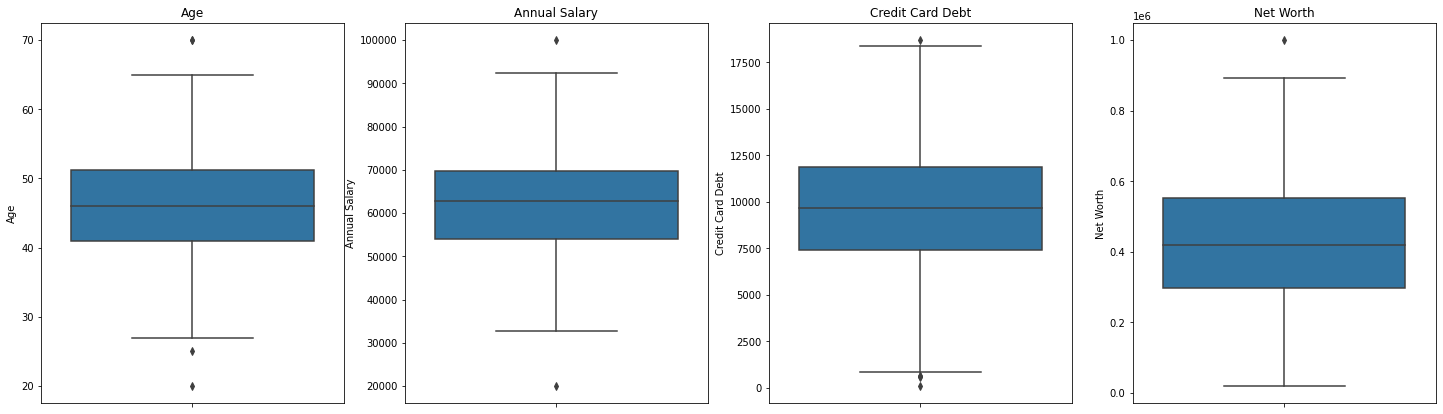

In [16]:
# we can directly use boxplot to visualize outliers.
# boxplots are standard way of displaying the distribution of a variable, utilising
# the first quantile, the median, the third quantile, and the whiskers

i = 1
fig = plt.figure(figsize=(25,7))

for var in continuous_variable:
    plt.subplot(1,4,i)
    sns.boxplot(y=x_train[var])
    plt.title(var)
    i = i + 1

## Project Part 3

In [17]:
df.head()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,1,57,59729.15130,5358.712177,560304.0671,55915.46248


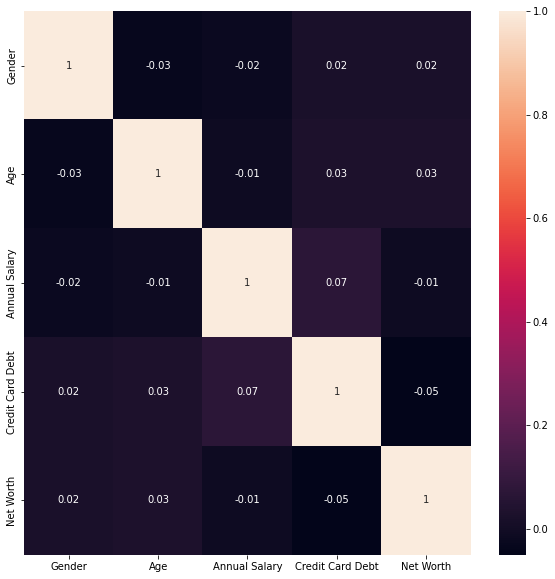

In [18]:
# we calculate the correlations using corr()
# and we round the values to 2 decimals
correlation_matrix = np.round(x_train.corr(),2)

# plot the correlation matric using seaborn
# we use annot = true to print the correlation values

fig = plt.figure(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True)

- We can see that there is no perfect linear relation between two or more variables. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


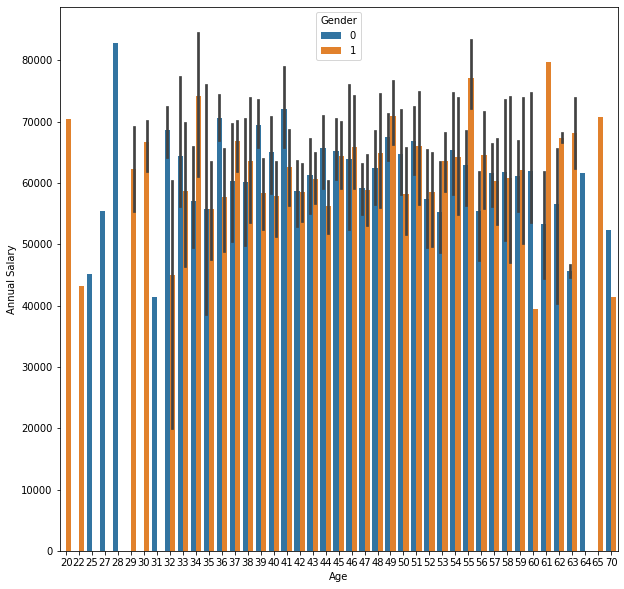

In [19]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(df['Age'], df['Annual Salary'], hue = df["Gender"])
plt.show()

- Looking at the visual above we see that an Age 29 Male holds the highest annual salary amongst the group. Males tend to hold high annual salaries than females according to the bar graph.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


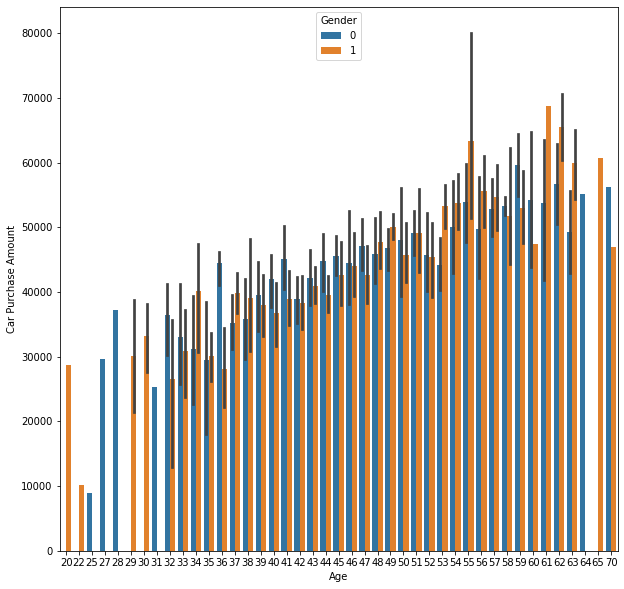

In [20]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(df['Age'], df['Car Purchase Amount'], hue = df["Gender"])
plt.show()

- Compared to the previous bar graph, although the 29 male has the highest annual salary it seems they do not purchase the most expensive car. 
- It seems the older the customer the more likely they are to purchase a more expensive car. As you can see the bar graph trend forward for both male and female. 

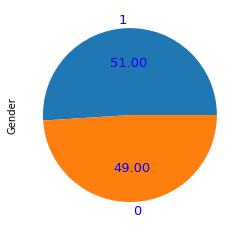

In [21]:
x_train['Gender'].value_counts().plot.pie(fontsize=13, autopct = '%.2f',
                                        textprops={'color':'b'})
plt.show()

- We have almost equal ratio of male and female as a customer.

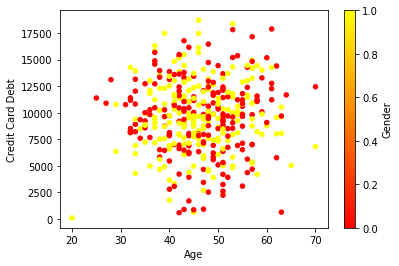

In [22]:
x_train.plot.scatter(x = 'Age', y = 'Credit Card Debt', c = 'Gender',
                    cmap = plt.get_cmap('autumn'), sharex=False)
plt.show()

- We see on the scatterplot there is higher correlaiton of credit card debt amongst the yellow dots vs the red dots. Ages 40-60 seems to have a signinficant amount of debt compared to the other age groups. 

## Part 4 

In [23]:
# Instantiate your model and fit it on the training set.
scaler = StandardScaler()
lin_reg = LinearRegression()

lin_reg_pipe = make_pipeline(scaler, lin_reg)

lin_reg_pipe.fit(x_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [24]:
train_pred = lin_reg_pipe.predict(x_train)
test_pred = lin_reg_pipe.predict(x_test)

In [25]:
# Calculating RMSE
train_RMSE = np.sqrt(np.mean(np.abs(train_pred - y_train)**2))
test_RMSE = np.sqrt(np.mean(np.abs(test_pred - y_test)**2))

print(f'Model Training MAE: {train_RMSE}')
print(f'Model Testing MAE: {test_RMSE}')

Model Training MAE: 238.53107042215473
Model Testing MAE: 248.3115012770459


- Model Training score is 238. 

- We can use k-fold cross validation to check the performance from accross the iterations to determine the average range and the standard deviation.

In [26]:
accuries = cross_val_score(lin_reg_pipe, x_train,y_train, cv=10)
print('Accuracy: {:.2f} %'.format(accuries.mean()*100))
print('Standard Deviation: {:.2f} %'.format(accuries.std()*100))

Accuracy: 99.94 %
Standard Deviation: 0.01 %


- Here the Standard deviation is very low which assures that the linear regression model is the best fit for our data

In [27]:
# Random forest model
forest = RandomForestRegressor()
forest.fit(x_train,y_train)
print(forest.score(x_test,y_test))

0.9549078673509894


In [28]:
# Decision Tree Model
tree = DecisionTreeRegressor(criterion='mae',max_depth=20)
tree.fit(x_train,y_train)
print(tree.score(x_test,y_test))

0.8575157117845262


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:370: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  FutureWarning,


In [29]:
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

# We are asking for the number of Principal Components that will retain 95% of the variance in the original features
pca = PCA(n_components = .95)

# Preprocessing Pipeline, so we can reuse it for other model types:
# We have only numeric data, so there is no need for a column transformer.  
# We can perform the same processing steps on all columns.
processing = make_pipeline(scaler, pca)

print('Shape before PCA:', x_train.shape)
print('Shape after PCA:', processing.fit_transform(x_train).shape)
print('Column count reduced by: ', x_train.shape[1] - processing.fit_transform(x_train).shape[1])

Shape before PCA: (400, 5)
Shape after PCA: (400, 5)
Column count reduced by:  0


- The columns remained the same while retaining 95% of the information (variance) of the original features.

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
from seaborn import heatmap

def eval_classification(model, X_train, X_test, y_train, y_test):
  print('Train Report:', classification_report(y_train, model.predict(X_train)))
  print('Test Report:', classification_report(y_test, model.predict(X_test)))

  cm = confusion_matrix(y_test, model.predict(X_test))

  plt.figure(figsize=(15, 15))
  heatmap(cm, annot=True)
  plt.xlabel('Predicted', fontsize=40)
  plt.ylabel('True', fontsize=40)
  plt.show()

- R2 score model perfomed based across all models deeming it the best production model. It performed at an accurary of 99% vs 96% and 86%. 

# Recommendation

- The company should target the older population due to the fact they are more likely to purchase a car with a high purchase amount.